In [1]:
import numpy as np
# from projectile import simulator_multioutput, print_results
# import mogp_emulator
import pandas as pd
from scipy.io import savemat, loadmat
try:
    import matplotlib.pyplot as plt
    makeplots = True
except ImportError:
    makeplots = False
import pickle
def lin2db(x):
    return 10*np.log10(x)
def db2lin(x):
    return 10**(x/10) 
from sklearn.linear_model import LinearRegression, BayesianRidge

In [2]:
launch_powers = loadmat("data/input_data_mW.mat")['lnch_pow_mW']
noise_powers = loadmat("data/output_data_mW.mat")['tot_noise_pow_mW']

Bayesian linear model:
$y \sim N(XW, \sigma^2)$  
Here $W = w_0, w_1, w_2, w_3, w_4, w_5$, such that $XW = w_0 + w_1p_1 + w_2p_2 + w_3p_3 + w_4p_4 + w_5p_5 $.  
Therefore, the bias $w_0$ in this model should correspond to ASE.

In [206]:
num_channels = launch_powers.shape[1]
num_examples = launch_powers.shape[0]
num_train = 150
num_test = 100
channel_idx = 0
x_train = launch_powers[:num_train]
y_train = noise_powers[:num_train]
x_test = launch_powers[num_train:]
y_test = noise_powers[num_train:]

# x_train = (x_train[:,channel_idx]**3).reshape(-1, 1)
# x_test = (x_test[:,channel_idx]**3).reshape(-1, 1)
x_train = (x_train**3)
x_test = (x_test**3)
y_train = y_train[:,channel_idx]
y_test = y_test[:,channel_idx]

In [207]:
# arr = np.zeros([150,15])
# arr[:,:5] = x_train
# arr[:,5:10] = x_train**2
# arr[:,10:15] = x_train**3
# arr.shape

In [208]:
# arr_test = np.zeros([100,15])
# arr_test[:,:5] = x_test
# arr_test[:,5:10] = x_test**2
# arr_test[:,10:15] = x_test**3
# arr_test.shape

In [209]:
regressor_bayes = BayesianRidge()
# bayes_lin_reg = regressor_bayes.fit(arr, y_train)
# bayes_lin_reg = regressor_bayes.fit(arr, y_train[:,channel_idx])
# bayes_lin_reg = regressor_bayes.fit(x_train**3, y_train[:,channel_idx])
bayes_lin_reg = regressor_bayes.fit(x_train, y_train)

In [210]:
bayes_lin_reg.coef_

array([ 0.00379225,  0.00025992,  0.00023478,  0.00038617, -0.00074396])

In [211]:
lin2db(bayes_lin_reg.intercept_)

-20.24074744948274

In [212]:
print("R^2 =",regressor_bayes.score(x_train, y_train))

R^2 = 0.9057610354507933


In [213]:
print("R^2 =",regressor_bayes.score(x_test, y_test))

R^2 = 0.9068069779455538


In [214]:
y_pred = regressor_bayes.predict(x_test)
# print("Training data MAE climb =", np.mean(abs(lin2db(y_test) - lin2db(y_pred))))
print("Training data MAE climb =", np.mean(abs(lin2db(y_test) - lin2db(y_pred))))

Training data MAE climb = 0.2975930329520136


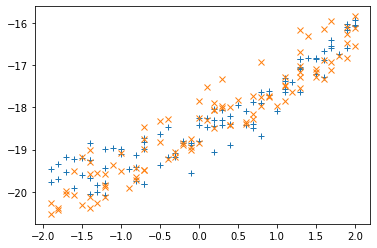

In [215]:
plt.plot(lin2db(x_test[:,channel_idx]**(1/3)), lin2db(y_pred), '+')
plt.plot(lin2db(x_test[:,channel_idx]**(1/3)), lin2db(y_test), 'x')
plt.show()

In [216]:
x_test_ex = np.linspace(0.1, db2lin(2.0), 1000)
arr = np.zeros([1000,5])
arr[:,0] = x_test_ex**3
arr[:,1] = x_test_ex**3
arr[:,2] = x_test_ex**3
arr[:,3] = x_test_ex**3
arr[:,4] = x_test_ex**3

In [217]:
# y_pred_ex = regressor_bayes.predict(x_test_ex**3)
y_pred_ex = regressor_bayes.predict(arr)

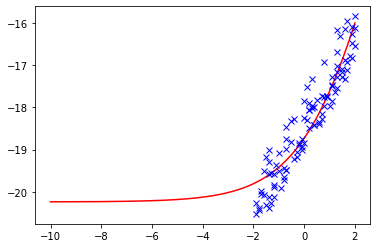

In [218]:
plt.plot(lin2db(x_test_ex), lin2db(y_pred_ex), 'r-')
plt.plot(lin2db(x_test[:,channel_idx]**(1/3)), lin2db(y_test), 'bx')
plt.show()